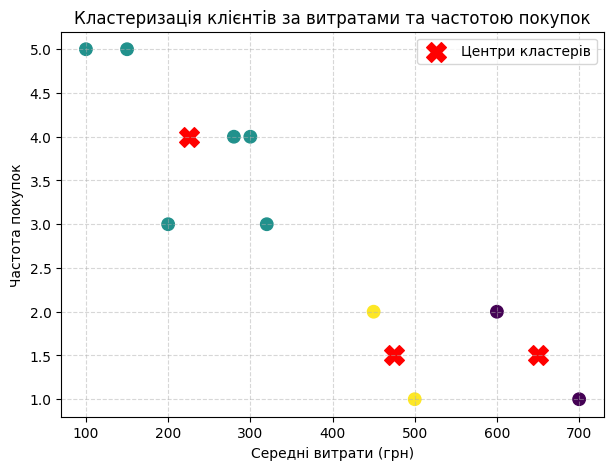

Результати кластеризації:
   avg_spend  purchase_freq  cluster
0        200              3        1
1        450              2        2
2        300              4        1
3        700              1        0
4        150              5        1
5        600              2        0
6        320              3        1
7        500              1        2
8        280              4        1
9        100              5        1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data = pd.DataFrame({
    'avg_spend': [200, 450, 300, 700, 150, 600, 320, 500, 280, 100],
    'purchase_freq': [3, 2, 4, 1, 5, 2, 3, 1, 4, 5]
})


kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['avg_spend', 'purchase_freq']])


centers = kmeans.cluster_centers_


plt.figure(figsize=(7, 5))
plt.scatter(data['avg_spend'], data['purchase_freq'], c=data['cluster'], cmap='viridis', s=80)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Центри кластерів')
plt.title("Кластеризація клієнтів за витратами та частотою покупок")
plt.xlabel("Середні витрати (грн)")
plt.ylabel("Частота покупок")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


print("Результати кластеризації:")
print(data)

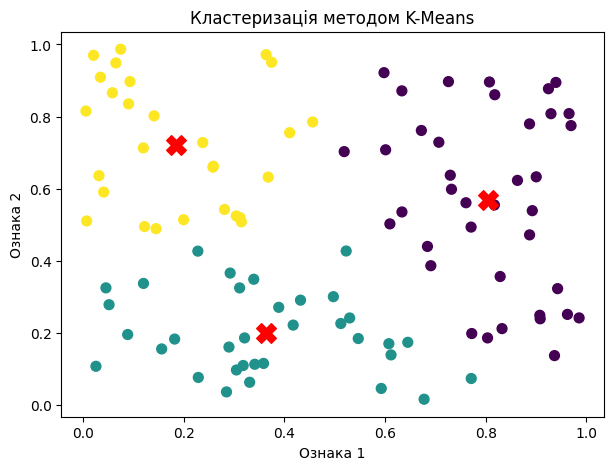

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


np.random.seed(42)
X = np.random.rand(100, 2)


k = 3


kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)


labels = kmeans.labels_
centers = kmeans.cluster_centers_


plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
plt.title("Кластеризація методом K-Means")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.show()

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=0ce8ab3b4e50e888bee6dd9f1472c6a9faab17eb6b592b92ad9cf561b567ec8f
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


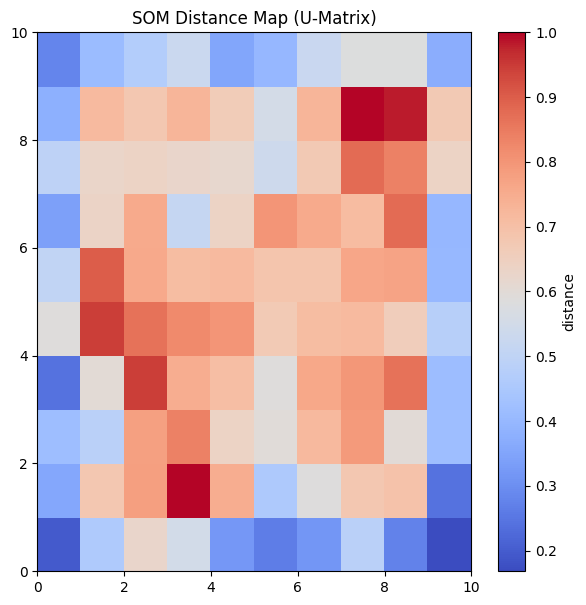

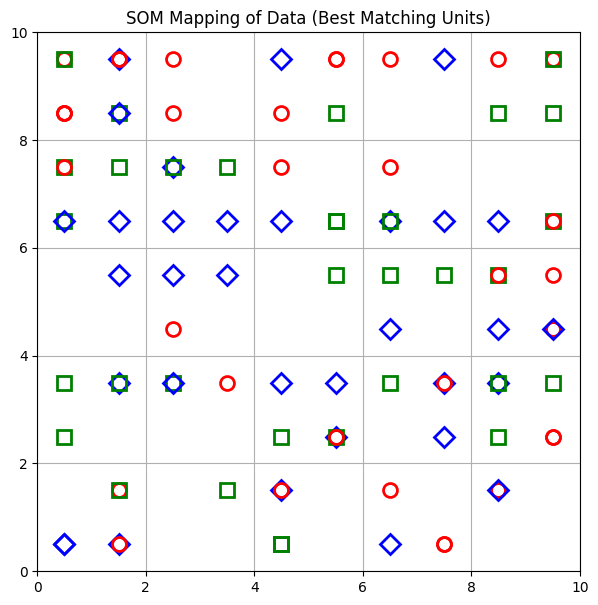

In [4]:
!pip install minisom

import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.rand(100, 3)

som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)

som.train_random(data, num_iteration=1000)

plt.figure(figsize=(7,7))
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar(label='distance')
plt.title('SOM Distance Map (U-Matrix)')
plt.show()

markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']

x_size, y_size, _ = som.get_weights().shape

plt.figure(figsize=(7,7))
for i, x in enumerate(data):
    w = som.winner(x)
    plt.plot(w[0]+0.5, w[1]+0.5, markers[i%3], markerfacecolor='None',
             markeredgecolor=colors[i%3], markersize=10, markeredgewidth=2)

plt.title('SOM Mapping of Data (Best Matching Units)')
plt.xlim([0, x_size])
plt.ylim([0, y_size])
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


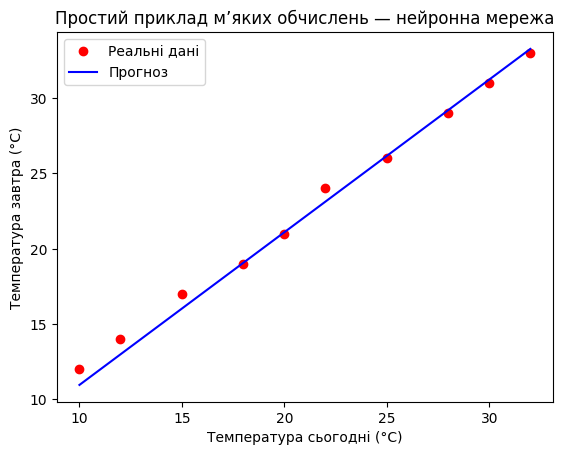

Якщо сьогодні 27°C, то очікувана температура завтра ≈ 28.2°C


In [5]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt


X = np.array([[10], [12], [15], [18], [20], [22], [25], [28], [30], [32]])
y = np.array([12, 14, 17, 19, 21, 24, 26, 29, 31, 33])


model = MLPRegressor(hidden_layer_sizes=(5,), max_iter=1000, random_state=1)
model.fit(X, y)


X_test = np.arange(10, 33, 1).reshape(-1, 1)
y_pred = model.predict(X_test)


plt.plot(X, y, 'ro', label='Реальні дані')
plt.plot(X_test, y_pred, 'b-', label='Прогноз')
plt.xlabel("Температура сьогодні (°C)")
plt.ylabel("Температура завтра (°C)")
plt.legend()
plt.title("Простий приклад м’яких обчислень — нейронна мережа")
plt.show()


temp_today = 27
predicted = model.predict([[temp_today]])[0]
print(f"Якщо сьогодні {temp_today}°C, то очікувана температура завтра ≈ {predicted:.1f}°C")

Матриця відстаней:
[[ 0 64 49 61 25]
 [22  0 28 26 72]
 [28 67  0 99 99]
 [71 32 18  0 10]
 [67 10 43 57  0]]

Найкращий маршрут: [0, np.int64(4), np.int64(1), np.int64(3), np.int64(2)]
Довжина маршруту: 107


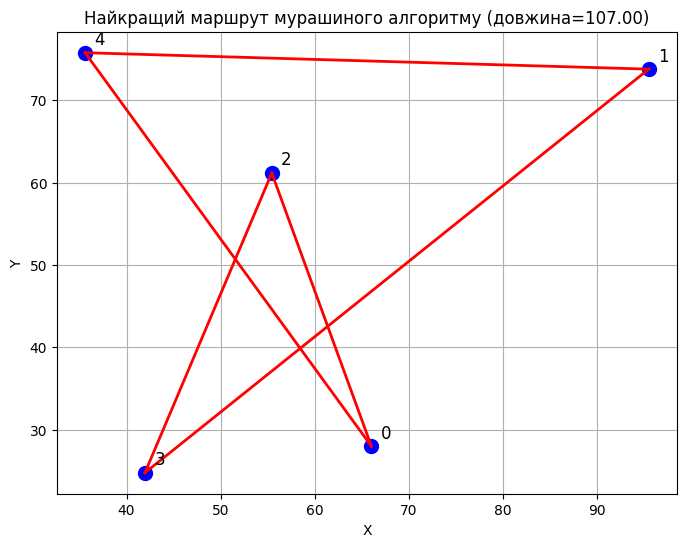

In [6]:
import numpy as np
import matplotlib.pyplot as plt


n_cities = 5
distances = np.random.randint(10, 100, size=(n_cities, n_cities))
np.fill_diagonal(distances, 0)


coords = np.random.rand(n_cities, 2) * 100


n_ants = 10
n_iterations = 50
alpha = 1.0
beta = 5.0
evaporation = 0.5
Q = 100
pheromones = np.ones((n_cities, n_cities))


def route_length(route):
    length = 0
    for i in range(len(route) - 1):
        length += distances[route[i], route[i + 1]]
    length += distances[route[-1], route[0]]
    return length


best_route = None
best_distance = float('inf')


for iteration in range(n_iterations):
    all_routes = []
    all_distances = []


    for ant in range(n_ants):
        route = [np.random.randint(n_cities)]
        while len(route) < n_cities:
            current = route[-1]
            probs = []
            for city in range(n_cities):
                if city not in route:
                    prob = (pheromones[current, city] ** alpha) * ((1 / distances[current, city]) ** beta)
                    probs.append(prob)
                else:
                    probs.append(0)
            probs = np.array(probs)
            probs /= probs.sum()
            next_city = np.random.choice(range(n_cities), p=probs)
            route.append(next_city)


        dist = route_length(route)
        all_routes.append(route)
        all_distances.append(dist)


        if dist < best_distance:
            best_distance = dist
            best_route = route


    pheromones *= (1 - evaporation)
    for route, dist in zip(all_routes, all_distances):
        for i in range(n_cities - 1):
            pheromones[route[i], route[i + 1]] += Q / dist
        pheromones[route[-1], route[0]] += Q / dist


print("Матриця відстаней:")
print(distances)
print("\nНайкращий маршрут:", best_route)
print("Довжина маршруту:", best_distance)


plt.figure(figsize=(8,6))
for i in range(n_cities):
    plt.scatter(coords[i,0], coords[i,1], c='blue', s=100)
    plt.text(coords[i,0]+1, coords[i,1]+1, str(i), fontsize=12)


for i in range(n_cities):
    start = coords[best_route[i]]
    end = coords[best_route[(i+1)%n_cities]]
    plt.plot([start[0], end[0]], [start[1], end[1]], 'r-', linewidth=2)


plt.title(f"Найкращий маршрут мурашиного алгоритму (довжина={best_distance:.2f})")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

Найкращий знайдений шлях: [2, 0, 1, 3, 4, 2]
Його довжина: 20.76


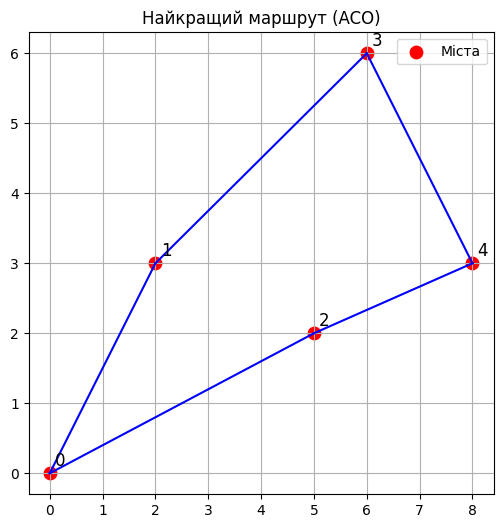

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt


cities = np.array([
    [0, 0],
    [2, 3],
    [5, 2],
    [6, 6],
    [8, 3]
])


n_cities = len(cities)


dist = np.zeros((n_cities, n_cities))
for i in range(n_cities):
    for j in range(n_cities):
        dist[i][j] = np.linalg.norm(cities[i] - cities[j])


n_ants = 20
alpha = 1
beta = 5
rho = 0.5
Q = 100
n_iter = 100


pheromone = np.ones((n_cities, n_cities))
best_length = float('inf')
best_path = None


for _ in range(n_iter):
    all_paths = []


    for _ in range(n_ants):
        path = [random.randint(0, n_cities - 1)]
        while len(path) < n_cities:
            i = path[-1]
            probs = []
            for j in range(n_cities):
                if j not in path:
                    tau = pheromone[i][j]
                    eta = (1 / dist[i][j])
                    probs.append(tau * eta)
                else:
                    probs.append(0)
            probs = np.array(probs)
            probs = probs / probs.sum()
            next_city = random.choices(range(n_cities), weights=probs)[0]
            path.append(next_city)
        path.append(path[0])
        length = sum(dist[path[i]][path[i+1]] for i in range(n_cities))
        all_paths.append((path, length))


    pheromone *= (1 - rho)
    for path, length in all_paths:
        for i in range(n_cities):
            a, b = path[i], path[i+1]
            pheromone[a][b] += Q / length
            pheromone[b][a] += Q / length


    for path, length in all_paths:
        if length < best_length:
            best_length = length
            best_path = path


print("Найкращий знайдений шлях:", best_path)
print("Його довжина:", round(best_length, 2))


plt.figure(figsize=(6,6))
plt.scatter(cities[:,0], cities[:,1], color='red', s=80, label='Міста')


for i in range(len(best_path)-1):
    a, b = best_path[i], best_path[i+1]
    plt.plot([cities[a,0], cities[b,0]], [cities[a,1], cities[b,1]], 'b-')


for i, (x, y) in enumerate(cities):
    plt.text(x + 0.1, y + 0.1, f'{i}', fontsize=12)


plt.title('Найкращий маршрут (ACO)')
plt.legend()
plt.grid(True)
plt.show()